VISUALIZACIÓN DE LA PRESIÓN Y EL VIENTO A 850hPA CORRESPONDIENTE A LAS 12:00 DEL DÍA 2024/04/22

In [ ]:
pip install ecmwf-data ecmwf-opendata magpye

VISUALIZACIÓN DE LA PRESIÓN MEDIA AL NIVEL DEL MAR Y VELOCIDAD DEL VIENTO A 850 hPa

In [ ]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client

In [ ]:
client = Client("ecmwf", beta=True)

## Realización de peticiones
Esta visualización utiliza parámetros a diferentes niveles verticales.  
La presión media al nivel del mar pertenece a los parámetros de superficie, mientras que u y v a 850 hPa son parámetros de nivel de presión.  
Los dos tipos de niveles no pueden estar en la misma petición, por lo que hay que hacer dos peticiones para ellos.

In [ ]:
sfc_parameters = ['msl']
pl_parameters = ['u', 'v']
sfc_filename = 'medium-mslp-wind850_sfc.grib'
pl_filename = 'medium-mslp-wind850_pl.grib'

Primero recuperamos los parámetros de superficie (presión media al nivel del mar)

Si no indicamos la fecha y la hora de la solicitud, descargará los datos más recientes (en nuestro caso, 2024-04-22 a las 00:00 horas)


In [ ]:
client.retrieve(
    step=12,
    stream="oper",
    type="fc",
    levtype="sfc",
    param=sfc_parameters,
    target=sfc_filename
)

20240422000000-12h-oper-fc.grib2:   0%|          | 0.00/516k [00:00<?, ?B/s]

Y a continuación las componentes u y v del viento en el nivel de presión 850 hPa
1.   Elemento de lista
2.   Elemento de lista



In [ ]:
client.retrieve(
    step=12,
    stream="oper",
    type="fc",
    levtype="pl",
    levelist=850,
    param=pl_parameters,
    target=pl_filename
)

20240422000000-12h-oper-fc.grib2:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

## Lectura y tratamiento de los datos
Ahora podemos utilizar **ecmwf.data** para leer los archivos.

In [ ]:
wind850 = ecdata.read(pl_filename)
msl = ecdata.read(sfc_filename)

La función **describe()** nos dará la visión general del conjunto de datos.  

In [ ]:
wind850.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
u,isobaricInhPa,850,20240422,0,12,None,131,od,oper,fc,0001
v,isobaricInhPa,850,20240422,0,12,None,132,od,oper,fc,0001


Y una vista general de un parámetro, donde podemos ver más información, como las unidades o el tipo de nivel.

In [ ]:
msl.describe('msl')

shortName,msl
name,Mean sea level pressure
paramId,151
units,Pa
typeOfLevel,meanSea
level,0
date,20240421
time,1800
step,12
number,None
class,od


Podemos utilizar la función ls() para listar todos los campos del fichero que hemos descargado.

In [ ]:
wind850.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,v,isobaricInhPa,850,20240421,1800,12,fc,None,regular_ll
1,ecmf,u,isobaricInhPa,850,20240421,1800,12,fc,None,regular_ll


Para calcular la velocidad, tenemos que filtrar las componentes u y v y utilizar la función speed() para el cálculo.

In [ ]:
u = wind850.select(shortName ='u')
v = wind850.select(shortName ='v')
speed = ecdata.speed(u,v)
speed.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
ws,isobaricInhPa,850,20240422,0,12,None,10,od,oper,fc,0001


Los datos de la presión media al nivel del mar tienen Pa como unidad, pero queremos representarlos en hPa, por lo que necesitamos convertirlos.

In [ ]:
msl /= 100

## Pintado de los datos
Por último, podemos representar los datos en el mapa.

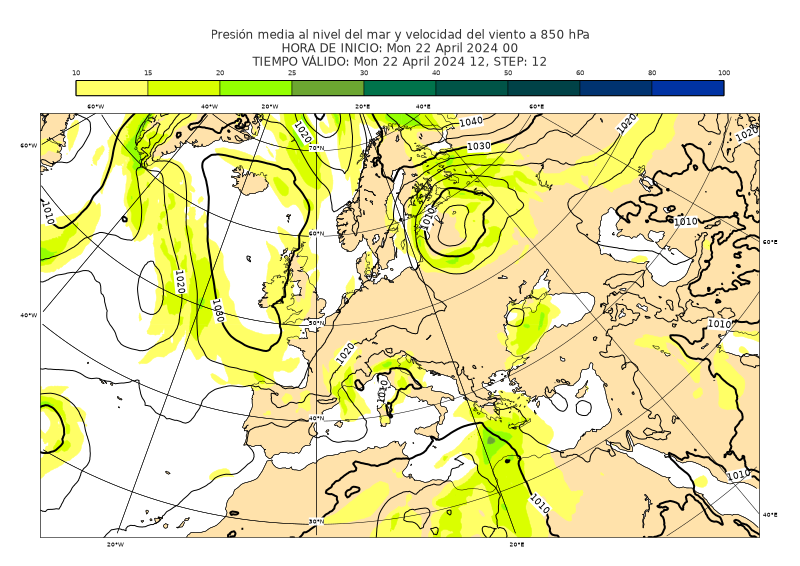

In [ ]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")

fig.contour_shaded(speed, style="speed_green_low")
fig.contour_lines(msl, style="black_i5")

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["Presión media al nivel del mar y velocidad del viento a 850 hPa",
           "HORA DE INICIO: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=msl'/> ",
           "TIEMPO VÁLIDO: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=msl'/>, STEP: <grib_info key='step' where='shortName=msl' />"])
fig.legend()
fig.show()